In [1]:
%%capture
import stata_setup, os
if os.name == 'nt':
    stata_setup.config('C:/Program Files/Stata17/','mp')
else:
    stata_setup.config('/usr/local/stata17','mp')

In [2]:
%%stata -qui

use "../data/data", clear
rename log_flesch_kincaid_grade_level FKG
quietly tabulate year, generate(y_)
quietly tabulate cluster, generate(c_)

local journals  ecm jpe qje res  //AER based category

local jel_imp a_imp b_imp c_imp  e_imp f_imp g_imp h_imp i_imp j_imp k_imp /// 
		l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp // D JEL based case


. summarize num_sentences, detail

        Number of sentences in the article's abstract
-------------------------------------------------------------
      Percentiles      Smallest
 1%            2              1
 5%            3              1
10%            4              1       Obs               4,988
25%            4              1       Sum of wgt.       4,988

50%            5                      Mean           5.503408
                        Largest       Std. dev.      1.877806
75%            6             18
90%            8             19       Variance       3.526156
95%            9             21       Skewness       1.451443
99%           12             24       Kurtosis       8.780317

. local cutoff_sentences = r(p5)

. gen int excess_sentences = num_sentences - `cutoff_sentences'

. replace excess_sentences = 0 if excess_sentences < 0
(68 real changes made)

. histogram excess_sentences, discrete freq width(1)
(start=0, width=1)

. 


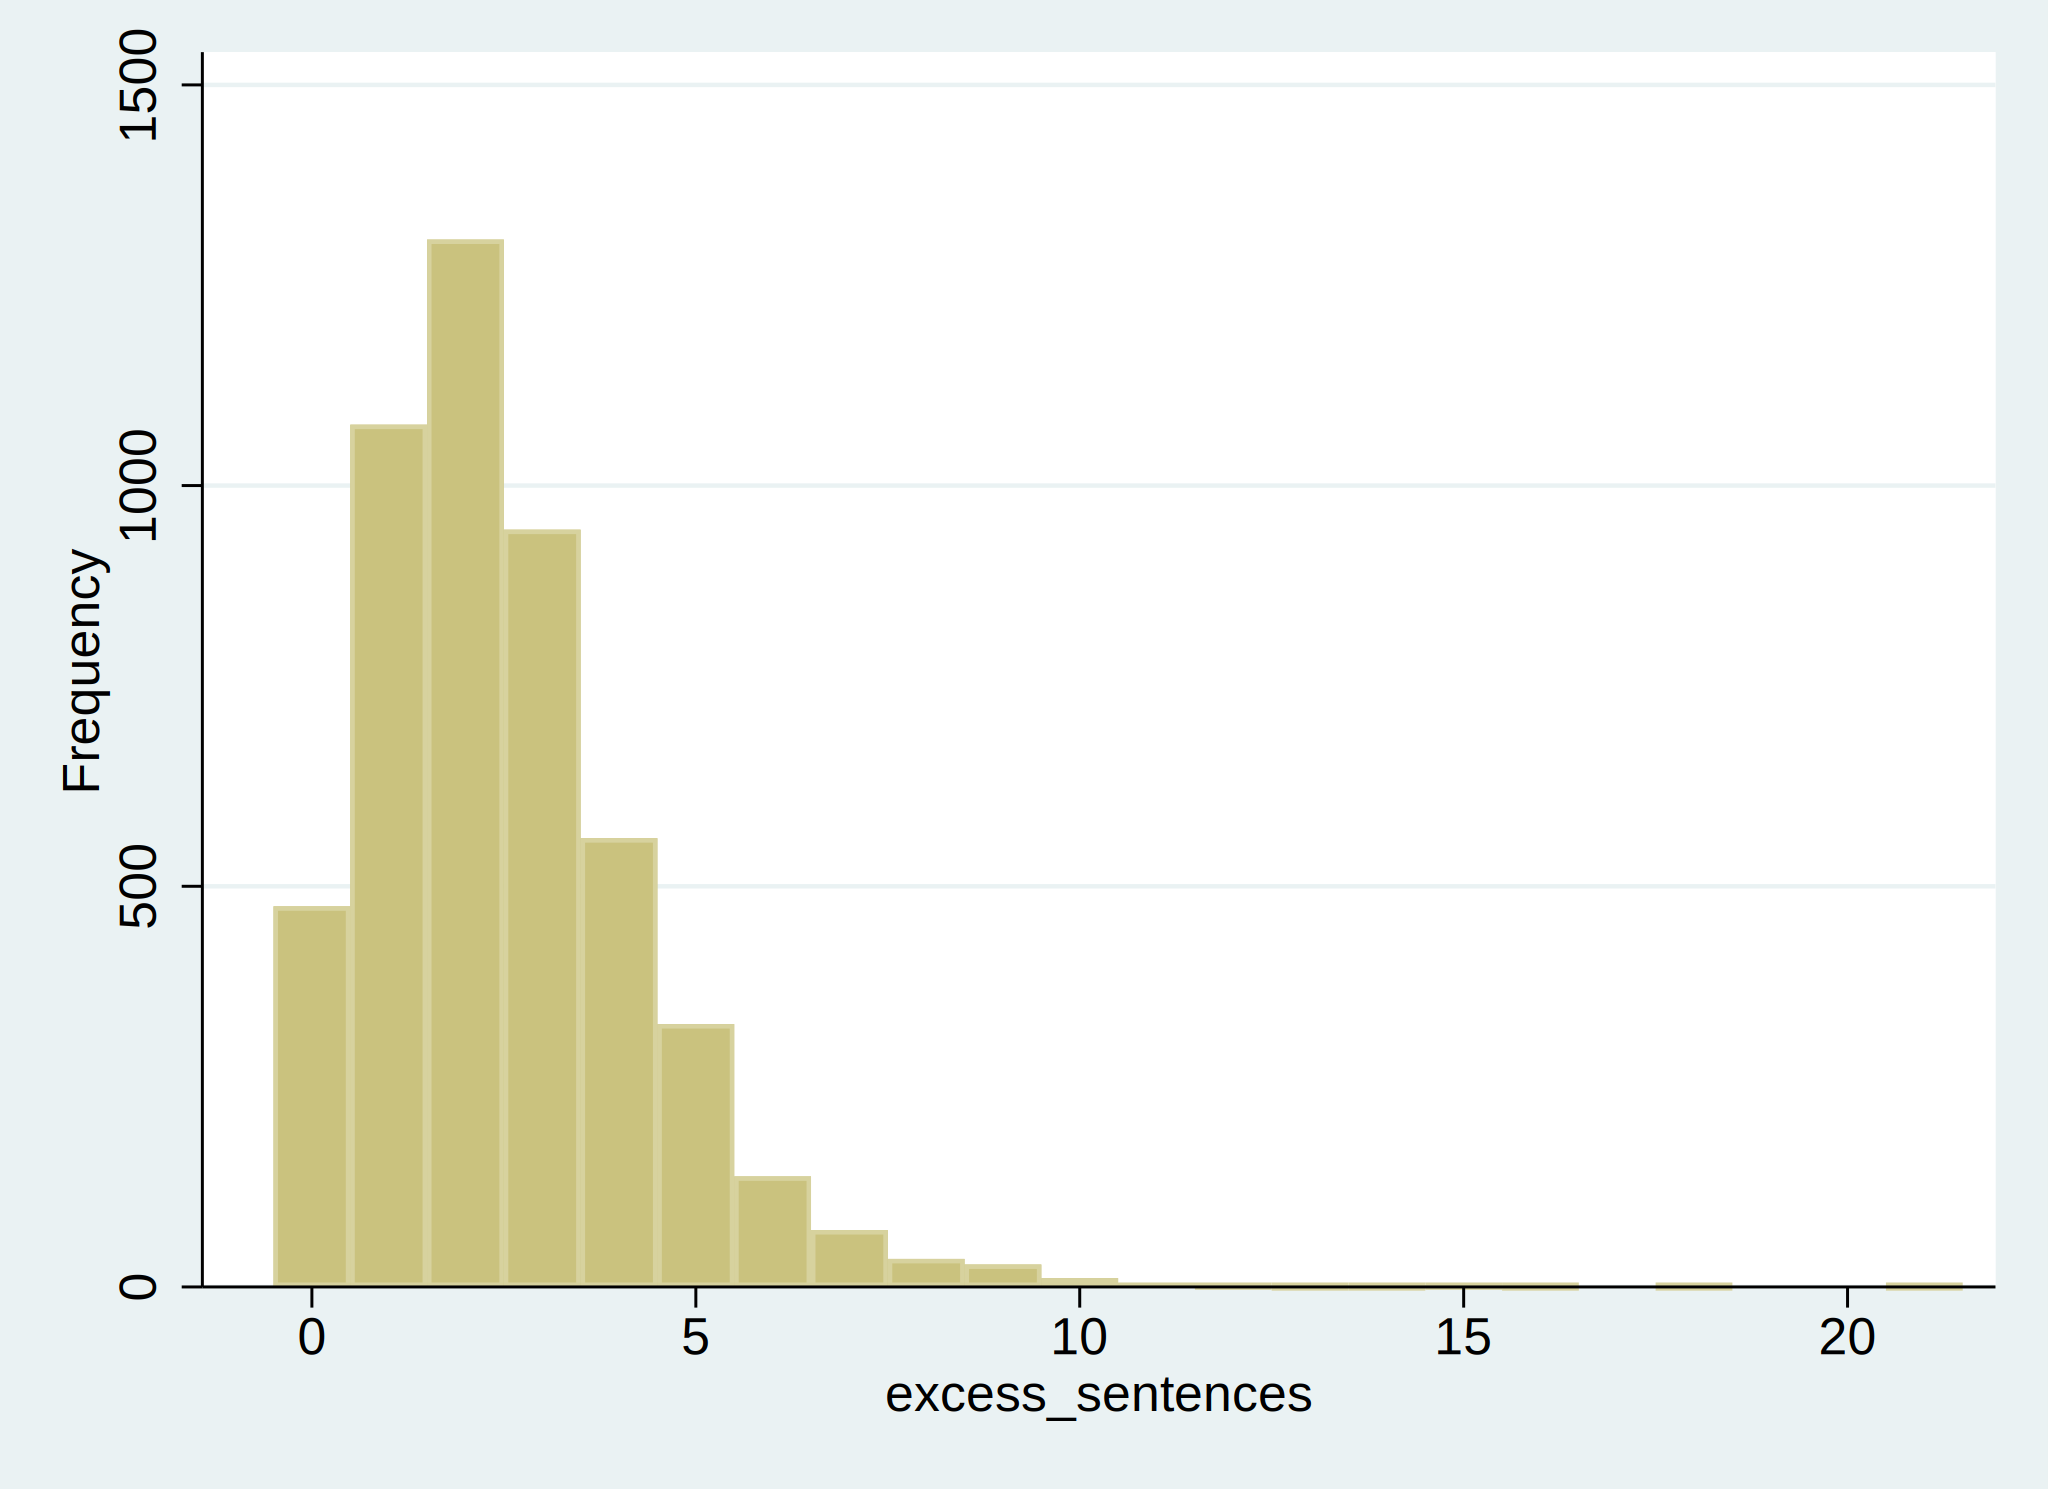

In [3]:
%%stata
summarize num_sentences, detail
local cutoff_sentences = r(p5)
gen int excess_sentences = num_sentences - `cutoff_sentences'
replace excess_sentences = 0 if excess_sentences < 0
histogram excess_sentences, discrete freq width(1)

In [4]:
%%stata -qui
#delimit ;
poisson excess_sentences log_num_authors log_num_pages both_genders prop_women
			          `journals' `jel_imp' y_2-y_20  c_2-c_215  jel_flag, vce(cluster cluster);
#delimit cr

In [5]:
%%stata
estimates table, keep(log_num_authors log_num_pages both_genders prop_women) b(%5.4f) star varwidth(50) varlabel


-----------------------------------------------------------------
                                          Variable |   Active    
---------------------------------------------------+-------------
                Logarithm of the number of authors | -0.0118     
                  Logarithm of the number of pages |  0.4093***  
    Indicator if author team includes both genders |  0.0004     
             Proportion of women among the authors |  0.0416*    
-----------------------------------------------------------------
                         Legend: * p<0.05; ** p<0.01; *** p<0.001


In [6]:
%%stata
egen journal1 = group(journal)
#delimit ;
ppmlhdfe excess_sentences log_num_authors log_num_pages both_genders prop_women,
                          absorb(journal1 a_imp b_imp c_imp  e_imp f_imp g_imp h_imp
                                i_imp j_imp k_imp l_imp m_imp n_imp o_imp p_imp q_imp r_imp y_imp z_imp
                                year ib0.cluster jel_flag) vce(cluster cluster);
#delimit cr


. egen journal1 = group(journal)

. #delimit ;
delimiter now ;
. ppmlhdfe excess_sentences log_num_authors log_num_pages both_genders prop_wom
> en,
>                           absorb(journal1 a_imp b_imp c_imp  e_imp f_imp g_im
> p h_imp
>                                 i_imp j_imp k_imp l_imp m_imp n_imp o_imp p_i
> mp q_imp r_imp y_imp z_imp
>                                 year ib0.cluster jel_flag) vce(cluster cluste
> r);
(warning: absorbing 23 dimensions of fixed effects; check that you really want 
> that)
(dropped 10 observations that are either singletons or separated by a fixed eff
> ect)
Iteration 1:   deviance = 5.5938e+03  eps = .         iters = 6    tol = 1.0e-0
> 4                                                                            
>    min(eta) =  -1.37  P   
Iteration 2:   deviance = 5.5369e+03  eps = 1.03e-02  iters = 5    tol = 1.0e-0
> 4                                                                            
>    min(eta) =  -1.77      
Iteration 3:

In [7]:
%%stata
estimates table, keep(log_num_authors log_num_pages both_genders prop_women) b(%5.4f) star varwidth(50) varlabel


-----------------------------------------------------------------
                                          Variable |   Active    
---------------------------------------------------+-------------
                Logarithm of the number of authors | -0.0118     
                  Logarithm of the number of pages |  0.4093***  
    Indicator if author team includes both genders |  0.0004     
             Proportion of women among the authors |  0.0416*    
-----------------------------------------------------------------
                         Legend: * p<0.05; ** p<0.01; *** p<0.001
